In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [3]:
memo = imread("../figs/memo.jpg")

In [4]:
memo

array([[[171,  73,  48],
        [163,  67,  42],
        [160,  69,  40],
        ...,
        [205, 143,  68],
        [211, 148,  77],
        [214, 151,  82]],

       [[181,  84,  49],
        [170,  76,  40],
        [165,  76,  36],
        ...,
        [210, 147,  76],
        [208, 148,  78],
        [205, 144,  77]],

       [[182,  93,  35],
        [170,  84,  27],
        [166,  81,  26],
        ...,
        [214, 153,  86],
        [211, 150,  85],
        [204, 143,  80]],

       ...,

       [[ 59,  51,  28],
        [ 64,  57,  38],
        [ 60,  57,  40],
        ...,
        [100,  89,  87],
        [103,  92,  90],
        [ 97,  86,  82]],

       [[ 56,  44,  20],
        [ 59,  51,  30],
        [ 53,  50,  31],
        ...,
        [ 98,  87,  83],
        [101,  92,  87],
        [101,  92,  87]],

       [[ 61,  46,  23],
        [ 63,  52,  30],
        [ 58,  53,  33],
        ...,
        [ 95,  86,  81],
        [ 92,  83,  78],
        [101,  94,  86]]

In [15]:
memo_bw = np.mean(memo,-1)
memo_bw

array([[ 97.33333333,  90.66666667,  89.66666667, ..., 138.66666667,
        145.33333333, 149.        ],
       [104.66666667,  95.33333333,  92.33333333, ..., 144.33333333,
        144.66666667, 142.        ],
       [103.33333333,  93.66666667,  91.        , ..., 151.        ,
        148.66666667, 142.33333333],
       ...,
       [ 46.        ,  53.        ,  52.33333333, ...,  92.        ,
         95.        ,  88.33333333],
       [ 40.        ,  46.66666667,  44.66666667, ...,  89.33333333,
         93.33333333,  93.33333333],
       [ 43.33333333,  48.33333333,  48.        , ...,  87.33333333,
         84.33333333,  93.66666667]])

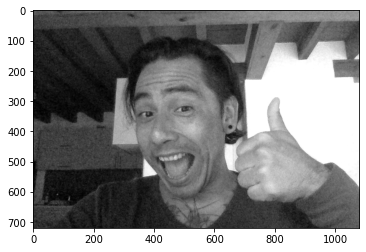

In [21]:
fig, ax = plt.subplots()

# ax.imshow(memo)
ax.imshow(memo_bw,cmap="gray")

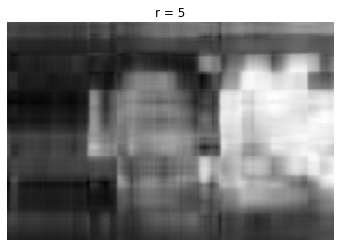

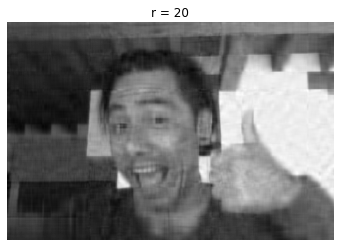

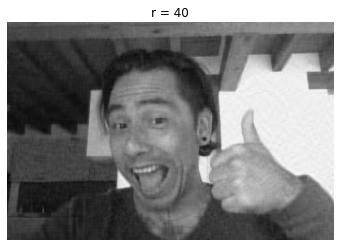

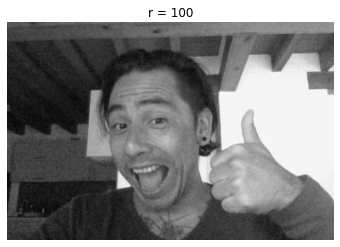

In [26]:
U, S, VT = np.linalg.svd(memo_bw,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 40, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [27]:
U[:,:5]

array([[-0.03345752, -0.05248385, -0.00126576,  0.00299939, -0.05078548],
       [-0.03339957, -0.05294462, -0.0015144 ,  0.00251496, -0.04744453],
       [-0.03329397, -0.05311482, -0.00095035,  0.00163496, -0.04439248],
       ...,
       [-0.01346099, -0.02918592,  0.00217383,  0.00780675, -0.00116084],
       [-0.01345666, -0.02890788,  0.0024282 ,  0.00746696,  0.00015649],
       [-0.01339689, -0.02840347,  0.00185473,  0.00621256,  0.00040291]])

In [29]:
S[:,:5]

array([[112304.89997069,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,  17288.62222142,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,  12874.29773917,
             0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ]])

In [43]:
sum = 0
for i in range(S.shape[0]):
#     print(S[i,i])
    sum = sum + S[i,i]
print(sum)

342700.7055611788


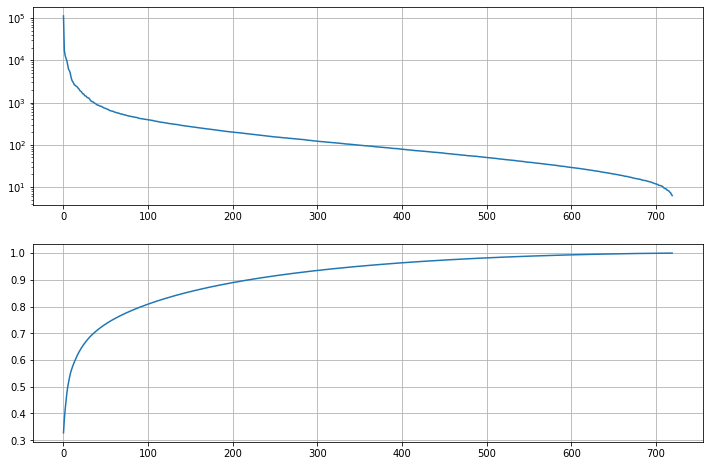

In [45]:
fig, ax = plt.subplots(2,figsize=(12,8))

ax[0].semilogy(np.diag(S))

ax[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))


for i in range(2):
    ax[i].grid()

In [44]:
np.cumsum(S)

array([112304.89997069, 112304.89997069, 112304.89997069, ...,
       342694.44903934, 342694.44903934, 342700.70556118])

In [41]:
np.sum(np.diag(S))

342700.7055611789